# Table of Contents
 <p><div class="lev1 toc-item"><a href="#TensorFlow" data-toc-modified-id="TensorFlow-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>TensorFlow</a></div><div class="lev1 toc-item"><a href="#Basic-operations" data-toc-modified-id="Basic-operations-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Basic operations</a></div><div class="lev2 toc-item"><a href="#Linear-Regression" data-toc-modified-id="Linear-Regression-21"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Linear Regression</a></div><div class="lev2 toc-item"><a href="#Logistic-Regression" data-toc-modified-id="Logistic-Regression-22"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Logistic Regression</a></div><div class="lev2 toc-item"><a href="#Neural-networks" data-toc-modified-id="Neural-networks-23"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Neural networks</a></div><div class="lev1 toc-item"><a href="#Higher-level" data-toc-modified-id="Higher-level-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Higher level</a></div><div class="lev2 toc-item"><a href="#Neural-network" data-toc-modified-id="Neural-network-31"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Neural network</a></div>

# TensorFlow

`TensorFlow` is an open source library for computation using data flow graphs (e.g., everything we've been doing so far).  It was originally developed by the Google Brain Team.

In [1]:
!pip install tensorflow

    100% |████████████████████████████████| 92.6MB 884kB/s 
    100% |████████████████████████████████| 3.2MB 7.5MB/s 
    100% |████████████████████████████████| 61kB 36.4MB/s 
    100% |████████████████████████████████| 2.2MB 8.0MB/s 
    100% |████████████████████████████████| 61kB 33.3MB/s 
    100% |████████████████████████████████| 368kB 37.2MB/s 
    100% |████████████████████████████████| 102kB 43.6MB/s 
    100% |████████████████████████████████| 92kB 40.8MB/s 
    100% |████████████████████████████████| 337kB 41.4MB/s 
    100% |████████████████████████████████| 61kB 33.6MB/s 
    100% |████████████████████████████████| 112kB 43.2MB/s 
  Stored in directory: /home/jovyan/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
  Stored in directory: /home/jovyan/.cache/pip/wheels/7c/06/54/bc84598ba1daf8f970247f550b175aaaee85f68b4b0c5ab2c6
  Stored in directory: /home/jovyan/.cache/pip/wheels/ee/98/38/46cbcc5a93cfea5492d19c38562691ddb23b940176c14f7b48
Succ

In [2]:
import tensorflow as tf

That probably killed your kernel.  Try again after upgrading `numpy`.

In [2]:
!pip install --upgrade numpy

    100% |████████████████████████████████| 12.2MB 78kB/s  eta 0:00:01   13% |████▎                           | 1.6MB 20.0MB/s eta 0:00:01    81% |██████████████████████████▏     | 9.9MB 34.9MB/s eta 0:00:01
  Found existing installation: numpy 1.12.1
    Uninstalling numpy-1.12.1:
      Successfully uninstalled numpy-1.12.1


In [3]:
import tensorflow as tf

# Basic operations

`TensorFlow` works with data as tensors, which for our purposes we'll just think of as a matrix.  Let's start off by creating two constant tensors containing one number each.

In [4]:
a = tf.constant(2)
b = tf.constant(3)

`TensorFlow` calculations are done in a `Session`.  The `Session` object has a `.run()` method for carrying out operations.  Let's do some very basic stuff with it.

In [5]:
with tf.Session() as sess:
    print("a: {}, b:{}".format(sess.run(a), sess.run(b)))
    print("a + b = {}".format(sess.run(a + b)))
    print("a * b = {}".format(sess.run(a * b)))

a: 2, b:3
a + b = 5
a * b = 6


We can get more abstract and define placeholder variables and operations to be done, without actually specifying values for the variable yet, kind of like standard function definitions.  Let's create two placeholders for integer tensors and define some opperations to be done with them.

In [6]:
a = tf.placeholder(tf.int16)
b = tf.placeholder(tf.int16)

add = tf.add(a, b)
mul = tf.multiply(a, b)

To carry out the operations on some actual values for `a` and `b` we'll need to start another session and `feed` values to the operations.

In [7]:
with tf.Session() as sess:
    print("a + b = {}".format(sess.run(add, feed_dict={a:2, b:3})))
    print("a * b = {}".format(sess.run(mul, feed_dict={a:2, b:3})))

a + b = 5
a * b = 6


Let's get a little more sophisticated and perform matrix multiplication.  We'll create a `(1, 2` shaped matrix and a `(2, 1)` shaped matrix to multiply.

In [8]:
matrix1 = tf.constant([[3., 3.]])
matrix2 = tf.constant([[2.], [2.]])

In [9]:
product = tf.matmul(matrix1, matrix2)

To actually carry out the operation, we need to run it in a session.

In [10]:
with tf.Session() as sess:
    result = sess.run(product)
    print(result)

[[12.]]


## Linear Regression

In [11]:
import numpy as np

%matplotlib inline
from matplotlib import pyplot as plt

Let's revisit the linear regression examples from week 2.

In [12]:
!wget https://raw.githubusercontent.com/davidwhogg/DataAnalysisRecipes/master/straightline/src/data_yerr.dat

--2019-04-23 06:17:43--  https://raw.githubusercontent.com/davidwhogg/DataAnalysisRecipes/master/straightline/src/data_yerr.dat
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.188.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.188.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 414 [text/plain]
Saving to: ‘data_yerr.dat’

data_yerr.dat       100%[===================>]     414  --.-KB/s    in 0s      

2019-04-23 06:17:44 (91.3 MB/s) - ‘data_yerr.dat’ saved [414/414]



Text(0, 0.5, '$y$')

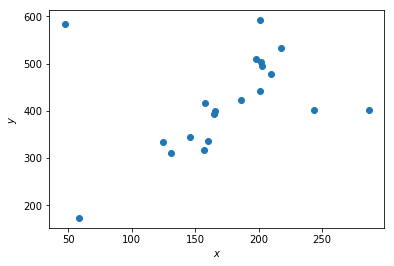

In [13]:
data = np.genfromtxt('data_yerr.dat', names=True, comments='#', delimiter='&')

train_X = data['x']
train_Y = data['y']

n_samples = train_X.shape[0]
plt.scatter(train_X, train_Y)
plt.xlabel('$x$')
plt.ylabel('$y$')

Let's create some placeholders for the data and outputs, and some `Variables` that are the weights we're trying to fit for.  To define a `Variable` in `TensorFlow` we need to give it an initial value.  We'll just use draws from a unit Gaussian.

In [14]:
X = tf.placeholder("float")
Y = tf.placeholder("float")

W = tf.Variable(np.random.randn(), name='weight')
b = tf.Variable(np.random.randn(), name='bias')

Instructions for updating:
Colocations handled automatically by placer.


Our hypothesis function, or predictor, is just our linear regression model.

In [15]:
pred = tf.add(tf.multiply(X, W), b)

We'll now define our mean squared error cost function using `TensorFlow` operations.

In [16]:
cost = tf.reduce_sum(tf.pow(pred - Y, 2))/(2*n_samples)

We'll use `TensorFlow`'s gradient descent for optimization with a learning rate of `0.001`.

In [17]:
learning_rate = 0.001

optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

Instructions for updating:
Use tf.cast instead.


We also need an initializer starting our variables at their initial values.

In [18]:
init = tf.global_variables_initializer()

Now we're ready to start our session.  We'll run the gradient descent for `1000` iterations.

Iteration: 50, cost = 8897.261719
	 W=2.355790138244629  b=1.5182547569274902
Iteration: 100, cost = 8852.069336
	 W=2.3464083671569824  b=2.8140902519226074
Iteration: 150, cost = 8807.463867
	 W=2.3370718955993652  b=4.103713512420654
Iteration: 200, cost = 8763.441406
	 W=2.32778000831604  b=5.387139797210693
Iteration: 250, cost = 8719.992188
	 W=2.318532943725586  b=6.6644086837768555
Iteration: 300, cost = 8677.110352
	 W=2.3093299865722656  b=7.935546398162842
Iteration: 350, cost = 8634.791016
	 W=2.300171375274658  b=9.200592041015625
Iteration: 400, cost = 8593.026367
	 W=2.2910566329956055  b=10.459561347961426
Iteration: 450, cost = 8551.812500
	 W=2.2819855213165283  b=11.712488174438477
Iteration: 500, cost = 8511.144531
	 W=2.272958278656006  b=12.95939826965332
Iteration: 550, cost = 8471.012695
	 W=2.263974189758301  b=14.200336456298828
Iteration: 600, cost = 8431.412109
	 W=2.255033016204834  b=15.435312271118164
Iteration: 650, cost = 8392.338867
	 W=2.2461349964141

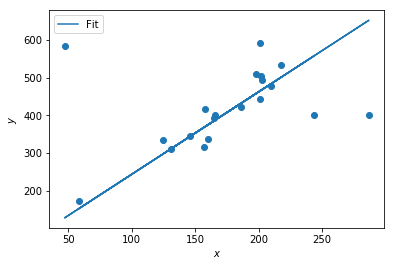

In [19]:
training_iterations = 1000
display_every = 50

with tf.Session() as sess:
    sess.run(init)
    
    # Fit the training data
    for i in range(training_iterations):
        for (x, y) in zip(train_X, train_Y):
            sess.run(optimizer, feed_dict={X:x, Y:y})
            
        # Display results for each step
        if (i + 1) % display_every == 0:
            c = sess.run(cost, feed_dict={X:train_X, Y:train_Y})
            print("Iteration: {}, cost = {:.6f}".format(i+1, c))
            print("\t W={}  b={}".format(sess.run(W), sess.run(b)))
    
    print("Done!")
    training_cost = sess.run(cost, feed_dict={X:train_X, Y:train_Y})
    print("Training cost = {}".format(training_cost))
    
    plt.scatter(train_X, train_Y)
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fit')
    plt.xlabel('$x$')
    plt.ylabel('$y$')
    plt.legend()

## Logistic Regression

Now let's use `TensorFlow` to perform logistic correction with the *softmax* activation function.

In [20]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data/", one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from t

Wait.  What does `one_hot` mean?  "One hot" is a general term for labeling categorical data with a list of binary numbers, with one bit flipped to indicate the category.

In [21]:
mnist = input_data.read_data_sets("/tmp/data/", one_hot=False)
print("standard: \n", mnist.train.labels[0])

mnist = input_data.read_data_sets("/tmp/data/", one_hot=True)
print("one hot: \n", mnist.train.labels[0])

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz
standard: 
 7
Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz
one hot: 
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


x shape: (784,)


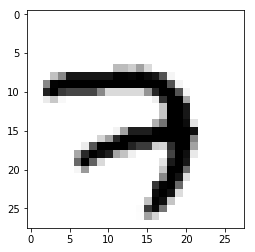

In [22]:
x = mnist.train.images[0]
print("x shape: {}".format(x.shape))
plt.imshow(x.reshape(-1, int(np.sqrt(x.shape[0]))), cmap='Greys')

Let's create our placeholders and variables.  Our training vectors are pixel values for a `28x28` image, so vectors of length `784`.  Our hypothesis will be a 10-element vector, with one element corresponding to each digit.

In [23]:
m = 784
K = 10

x = tf.placeholder(tf.float32, [None, m])
y = tf.placeholder(tf.float32, [None, K])

# model weights
W = tf.Variable(tf.zeros([m, K]))
b = tf.Variable(tf.zeros([K]))

# construct the model
pred = tf.nn.softmax(tf.matmul(x, W) + b)

Recall our logistic cost function:
$$
J(\theta) = -\frac{1}{m}\left[\sum_{i=1}^m y^{(i)}\log h_\theta(x^{(i)}) + (1 - y^{(i)})\log (1 - h_\theta(x^{(i)})\right]
$$

It turns out this is something called the *cross-entropy*
$$
H(p, q) = -\sum_x p(x)\log q(x)
$$
for the case of $p \in \{y, 1-y\}$, $q\in\{h_\theta(x), 1 - h_\theta(x)\}$.  We'll use the general form to define our cost function.

In [24]:
learning_rate = 0.01

# cost function and optimizer
cost = tf.reduce_mean(-tf.reduce_sum(y*tf.log(pred), reduction_indices=1))
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

# initializer
init = tf.global_variables_initializer()

Now let's do the fit.  We'll break up the training set into batches of `100`.

In [25]:
training_iterations = 25
batch_size = 100
n_batchs = int(mnist.train.num_examples/batch_size)

with tf.Session() as sess:
    sess.run(init)
    
    for i in range(training_iterations):
        avg_cost = 0.
        for j in range(n_batchs):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            
            # Fit using the batch data
            _, c = sess.run([optimizer, cost], feed_dict={x:batch_xs, y:batch_ys})
            
            # Compute the average loss
            avg_cost += c / n_batchs
        print("Iteration: {}, cost = {:.6f}".format(i+1, avg_cost))
        
    print("Done!")

    # Test model
    correct_pred = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1))
    
    # Calculate accuracy for some examples
    accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))
    print("Accuracy: {:.0f}%".format(100*sess.run(accuracy, feed_dict={x:mnist.test.images,
                                                                       y:mnist.test.labels})))

Iteration: 1, cost = 1.183609
Iteration: 2, cost = 0.665281
Iteration: 3, cost = 0.552870
Iteration: 4, cost = 0.498681
Iteration: 5, cost = 0.465523
Iteration: 6, cost = 0.442664
Iteration: 7, cost = 0.425588
Iteration: 8, cost = 0.412268
Iteration: 9, cost = 0.401405
Iteration: 10, cost = 0.392406
Iteration: 11, cost = 0.384816
Iteration: 12, cost = 0.378141
Iteration: 13, cost = 0.372383
Iteration: 14, cost = 0.367321
Iteration: 15, cost = 0.362793
Iteration: 16, cost = 0.358635
Iteration: 17, cost = 0.354889
Iteration: 18, cost = 0.351473
Iteration: 19, cost = 0.348358
Iteration: 20, cost = 0.345436
Iteration: 21, cost = 0.342705
Iteration: 22, cost = 0.340260
Iteration: 23, cost = 0.337972
Iteration: 24, cost = 0.335730
Iteration: 25, cost = 0.333709
Done!
Accuracy: 91%


## Neural networks

Now let's build a neural network using `TensorFlow`.  We'll build a fully connected four-layer network (two hidden layers).

In [26]:
mnist = input_data.read_data_sets("/tmp/data/", one_hot=True)

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


In [27]:
# Network properties
n_hidden_layer_1 = 256  # Number of neurons in first hidden layer
n_hidden_layer_2 = 256  # Number of neurons in second hidden layer

n_training = 784
n_classes = 10

X = tf.placeholder("float", [None, n_training])
Y = tf.placeholder("float", [None, n_classes])

In [28]:
weights = {
    'h1':tf.Variable(tf.random_normal([n_training, n_hidden_layer_1])),
    'h2':tf.Variable(tf.random_normal([n_hidden_layer_1, n_hidden_layer_2])),
    'out':tf.Variable(tf.random_normal([n_hidden_layer_2, n_classes]))
}

biases = {
    'b1':tf.Variable(tf.random_normal([n_hidden_layer_1])),
    'b2':tf.Variable(tf.random_normal([n_hidden_layer_2])),
    'out':tf.Variable(tf.random_normal([n_classes]))
}

Now let's construct the model.

In [29]:
def neural_network(x):
    layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
    layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2'])
    output_layer = tf.matmul(layer_2, weights['out']) + biases['out']
    
    return output_layer

hypotheses = neural_network(X)

In [30]:
learning_rate = 0.1

loss_op = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=hypotheses, labels=Y))
optimizer = tf.train.AdadeltaOptimizer(learning_rate)
training_op = optimizer.minimize(loss_op)

correct_prediction = tf.equal(tf.argmax(hypotheses, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

init = tf.global_variables_initializer()

Now let's run the session.

In [31]:
training_iterations = 5000
display_every = 500

batch_size = 128
n_batchs = mnist.train.num_examples // batch_size

with tf.Session() as sess:
    sess.run(init)
    
    for i in range(training_iterations + 1):
        batch_x, batch_y = mnist.train.next_batch(batch_size)
        
        sess.run(training_op, feed_dict={X:batch_x, Y:batch_y})
        
        if i % display_every == 0:
            loss, acc = sess.run([loss_op, accuracy], feed_dict={X:batch_x,
                                                                 Y:batch_y})

            print("Iteration: {}, batch loss = {:.6f}, batch acc. = {:.0f}%".format(i, loss, 100*acc))
    print("Done!")
    
    print("Accuracy: {:.0f}%".format(100*accuracy.eval({X:mnist.test.images,
                                                        Y:mnist.test.labels})))

Iteration: 0, batch loss = 3232.014404, batch acc. = 14%
Iteration: 500, batch loss = 1515.098389, batch acc. = 33%
Iteration: 1000, batch loss = 694.894409, batch acc. = 51%
Iteration: 1500, batch loss = 429.387207, batch acc. = 67%
Iteration: 2000, batch loss = 462.213318, batch acc. = 69%
Iteration: 2500, batch loss = 243.006348, batch acc. = 77%
Iteration: 3000, batch loss = 246.172943, batch acc. = 73%
Iteration: 3500, batch loss = 170.504639, batch acc. = 81%
Iteration: 4000, batch loss = 123.056999, batch acc. = 85%
Iteration: 4500, batch loss = 220.531921, batch acc. = 79%
Iteration: 5000, batch loss = 129.541183, batch acc. = 83%
Done!
Accuracy: 83%


# Higher level

## Neural network

In [32]:
mnist = input_data.read_data_sets("/tmp/data/", one_hot=False)

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


Now that we have a bit of an understanding of the mechanics of neural nets, lets take advantage of higher-level routines in `TensorFlow` to build the same network.

In [33]:
# Network properties
n_hidden_layer_1 = 256  # Number of neurons in first hidden layer
n_hidden_layer_2 = 256  # Number of neurons in second hidden layer

n_training = 784
n_classes = 10

We need to define an input function for training.

In [34]:
batch_size = 128

input_fn = tf.estimator.inputs.numpy_input_fn(x={'images':mnist.train.images},
                                              y=mnist.train.labels,
                                              batch_size=batch_size,
                                              num_epochs=None, shuffle=True)

Now define the network.

In [35]:
def neural_network(x_dict):
    x = x_dict['images']
    
    layer_1 = tf.layers.dense(x, n_hidden_layer_1)
    layer_2 = tf.layers.dense(layer_1, n_hidden_layer_2)
    output_layer = tf.layers.dense(layer_2, n_classes)
    
    return output_layer

Now we'll build a model function.

In [36]:
learning_rate = 0.1

def model_fn(features, labels, mode):
    hypotheses = neural_network(features)
    
    # predictions
    predicted_classes = tf.argmax(hypotheses, axis=1)
    
    # if prediction mode, return now
    if mode == tf.estimator.ModeKeys.PREDICT:
        return tf.estimator.EstimatorSpec(mode, predictions=predicted_classes)
    
    # loss and optimizer
    loss_op = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(logits=hypotheses,
                                                                            labels=tf.cast(labels, dtype=tf.int32)))
    optimizer = tf.train.GradientDescentOptimizer(learning_rate)
    training_op = optimizer.minimize(loss_op, global_step=tf.train.get_global_step())
    
    # eval accuracy
    accuracy_op = tf.metrics.accuracy(labels=labels, predictions=predicted_classes)
    
    estim_specs = tf.estimator.EstimatorSpec(mode=mode,
                                             predictions=predicted_classes,
                                             loss=loss_op,
                                             train_op=training_op,
                                             eval_metric_ops={'accuracy':accuracy_op})
    return estim_specs

In [37]:
model = tf.estimator.Estimator(model_fn)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmp3s0c32s_', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f8f4c5969b0>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [38]:
training_iterations = 1000

model.train(input_fn, steps=training_iterations)

Instructions for updating:
To construct input pipelines, use the `tf.data` module.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Calling model_fn.
Instructions for updating:
Use keras.layers.dense instead.
Instructions for updating:
Use tf.cast instead.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Saving checkpoints for 0 into /tmp/tmp3s0c32s_/model.ckpt.
INFO:tensorflow:loss = 2.3427098, step = 1
INFO:tensorflow:global_step/sec: 278.054
INFO:tensorflow:loss = 0.5334778, step = 101 (0.361 sec)
INFO:tensorflow:global_step/sec: 293.296
INFO:tensorflow:loss = 0.4611236, step = 201 (0.341 sec)
INFO:tensorflow:global_step/sec: 284.03
INFO:tensorflow:loss = 0.2840171, step = 301 (0.352 s

Now let's setup an input fuctions for the test data.

In [39]:
input_fn = tf.estimator.inputs.numpy_input_fn(x={'images': mnist.test.images},
                                              y=mnist.test.labels,
                                              batch_size=batch_size, shuffle=False)

model.evaluate(input_fn)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-04-23T06:20:49Z
INFO:tensorflow:Graph was finalized.
Instructions for updating:
Use standard file APIs to check for files with this prefix.
INFO:tensorflow:Restoring parameters from /tmp/tmp3s0c32s_/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2019-04-23-06:20:50
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.9145, global_step = 1000, loss = 0.29595944
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 1000: /tmp/tmp3s0c32s_/model.ckpt-1000


{'accuracy': 0.9145, 'loss': 0.29595944, 'global_step': 1000}

Let's take a look at how are model is doing at predicting individual images from the test set.

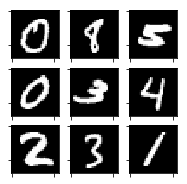

In [40]:
n_images = 9

sel = np.random.choice(len(mnist.test.images), n_images)
test_images = mnist.test.images[sel]

nrows = int(np.ceil(np.sqrt(n_images)))
ncols = int(np.ceil(n_images/nrows))
fig, axs = plt.subplots(nrows, ncols, figsize=(3, 3))
axs = axs.flatten()
for i, img in enumerate(test_images):
    axs[i].imshow(np.reshape(test_images[i], [28, 28]), cmap='gray')
    axs[i].set_xticklabels([])
    axs[i].set_yticklabels([])

In [41]:
# Prepare the input data
input_fn = tf.estimator.inputs.numpy_input_fn(x={'images': test_images},
                                              shuffle=False)

# Use the model to predict the images class
predictions = list(model.predict(input_fn))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmp3s0c32s_/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


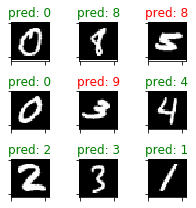

In [42]:
fig, axs = plt.subplots(nrows, ncols, figsize=(3, 3))
axs = axs.flatten()
for i, img in enumerate(test_images):
    axs[i].imshow(np.reshape(test_images[i], [28, 28]), cmap='gray')
    axs[i].set_xticklabels([])
    axs[i].set_yticklabels([])
    color = 'g' if predictions[i] == mnist.test.labels[sel][i] else 'r'
    axs[i].set_title("pred: {}".format(predictions[i]), color=color)
plt.tight_layout()